**b-value** adalah Parameter tektonik dapat mencerminkan
akumulasi stress lokal sehingga dapat menjadi parameter
kegempaan yang didapat dari frekuensi relatif dari jumlah
kejadian gempa besar dan gempa kecil di suatu wilayah.
**b-value** digunakan untuk mengetahui perubahan fenomena
fisis yang diamati sebelum terjadinya gempa bumi.
Fenomena fisis yang dapat diamati adalah akumulasi
tegangan yang kemudian akan dilepaskan saat terjadi gempa
bumi. **b-value** memiliki korelasi terhadap distribusi tegangan
dan regangan sehingga dapat dijadikan indikator tegangan
pada suatu wilayah

Sedangkan variasi temporal pada **b-value** merupakan
variasi **b-value** terhadap seri waktu, yang bisa dijadikan
prekusor terjadinya gempa bumi pada jangka waktu tertentu.
Hasil penelitian menunjukkan bahwa gempa bumi sering
kali didahului dengan peningkatan **b-value** pada jangka waktu
menengah, dan diikuti dengan penurunan pada jangka waktu
minggu hingga bulan sebelum gempa bumi signifikan

**b-value** dapat dicari menggunakan regresi linier atau maximum likelihood dan least mean square

In [1]:
!pip install basemap-data-hires
!pip install seaborn
!pip install basemap numpy pandas scipy
!pip install cartopy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.1/91.1 MB 9.9 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 860.6/860.6 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 32.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 63.9 MB/s eta 0:00:00
  Attempting uninstall: pyproj
    Found existing installation: pyproj 3.6.0
    Uninstalling pyproj-3.6.0:
      Successfully uninstalled pyproj-3.6.0


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 77.0 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from mpl_toolkits.basemap import Basemap
from matplotlib.colors import LogNorm, Normalize
from scipy.stats import linregress

In [3]:
#from google.colab import drive
#drive.mount("/content/drive")

#jika dari dataset github
dataset = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/USGS/database_original.csv"
data_gempa = pd.read_csv(dataset)
data_gempa.head(5)

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,ID,Source,Location Source,Magnitude Source,Status
0,1/2/1965,13:44:18,19.246,145.616,Earthquake,131.6,6.0,MW,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,1/4/1965,11:29:49,1.863,127.352,Earthquake,80.0,5.8,MW,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,1/5/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,6.2,MW,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,1/8/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,5.8,MW,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,1/9/1965,13:32:50,11.938,126.427,Earthquake,15.0,5.8,MW,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


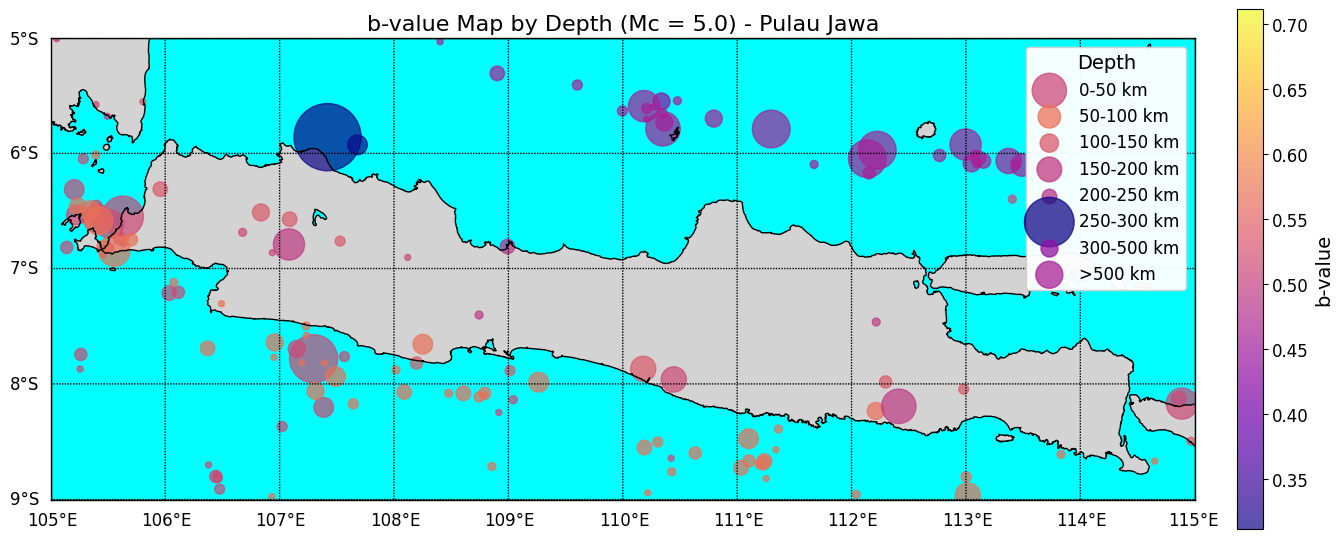

In [4]:
# Load dataset gempa dari URL atau file lokal jika sudah didownload
url = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/USGS/database_original.csv"

# Membaca dataset gempa
data_gempa = pd.read_csv(url)

# Menghapus baris dengan nilai NaN pada kolom 'Magnitude', 'Latitude', 'Longitude', dan 'Depth'
data_gempa = data_gempa.dropna(subset=['Magnitude', 'Latitude', 'Longitude', 'Depth'])

# Batas-batas wilayah Pulau Jawa
lon_min, lon_max = 105, 115
lat_min, lat_max = -9, -5

# Memfilter data hanya untuk wilayah Pulau Jawa
data_jawa = data_gempa[(data_gempa['Longitude'] >= lon_min) & (data_gempa['Longitude'] <= lon_max) &
                       (data_gempa['Latitude'] >= lat_min) & (data_gempa['Latitude'] <= lat_max)]

# Magnitude of completeness (Mc)
mc = 5.0

# Menghitung b-value untuk seluruh data
b_value_all = np.log10(np.exp(1)) / (np.mean(data_jawa['Magnitude']) - mc)

# Membuat peta distribusi spasial b-value berdasarkan kedalaman untuk wilayah Pulau Jawa
plt.figure(figsize=(18, 9))
m = Basemap(projection='merc', llcrnrlat=lat_min, urcrnrlat=lat_max, llcrnrlon=lon_min, urcrnrlon=lon_max, resolution='h')
m.drawmapboundary(fill_color='aqua')
m.fillcontinents(color='lightgray', lake_color='aqua')
m.drawcoastlines()
m.drawparallels(np.arange(lat_min, lat_max+1, 1), labels=[1, 0, 0, 0], fontsize=12)
m.drawmeridians(np.arange(lon_min, lon_max+1, 1), labels=[0, 0, 0, 1], fontsize=12)

# Memisahkan data gempa berdasarkan kedalaman
depth_bins = [0, 50, 100, 150, 200, 250, 300, 500, 1000]
depth_labels = ['0-50 km', '50-100 km', '100-150 km', '150-200 km', '200-250 km', '250-300 km', '300-500 km', '>500 km']

for i in range(len(depth_bins)-1):
    depth_range = data_jawa[(data_jawa['Depth'] >= depth_bins[i]) & (data_jawa['Depth'] < depth_bins[i+1])]
    if len(depth_range) > 0:
        # Menghitung b-value untuk data dalam kedalaman tertentu
        b_value_depth = np.log10(np.exp(1)) / (np.mean(depth_range['Magnitude']) - mc)

        # Menambahkan titik-titik pada peta untuk mewakili gempa dengan warna berdasarkan b-value
        x, y = m(depth_range['Longitude'].values, depth_range['Latitude'].values)
        c = m.scatter(x, y, c=[b_value_depth]*len(x), cmap='plasma',
                      norm=Normalize(vmin=b_value_all - 0.2, vmax=b_value_all + 0.2),
                      s=150*(depth_range['Magnitude']-mc)**3, alpha=0.7, label=depth_labels[i])

# Menambahkan nilai angka b-value pada sumbu x pada peta
cbar_b = plt.colorbar(c, orientation='vertical', pad=0.03, shrink=0.75, format='%.2f')
cbar_b.set_label("b-value", fontsize=14)

# Menyesuaikan ukuran teks pada sumbu colorbar
cbar_b.ax.tick_params(labelsize=12)

# Menambahkan legend untuk kedalaman
depth_legend = plt.legend(loc='upper right', fontsize=12, title='Depth', title_fontsize=14)
plt.gca().add_artist(depth_legend)

plt.title(f"b-value Map by Depth (Mc = {mc}) - Pulau Jawa", fontsize=16)
plt.show()


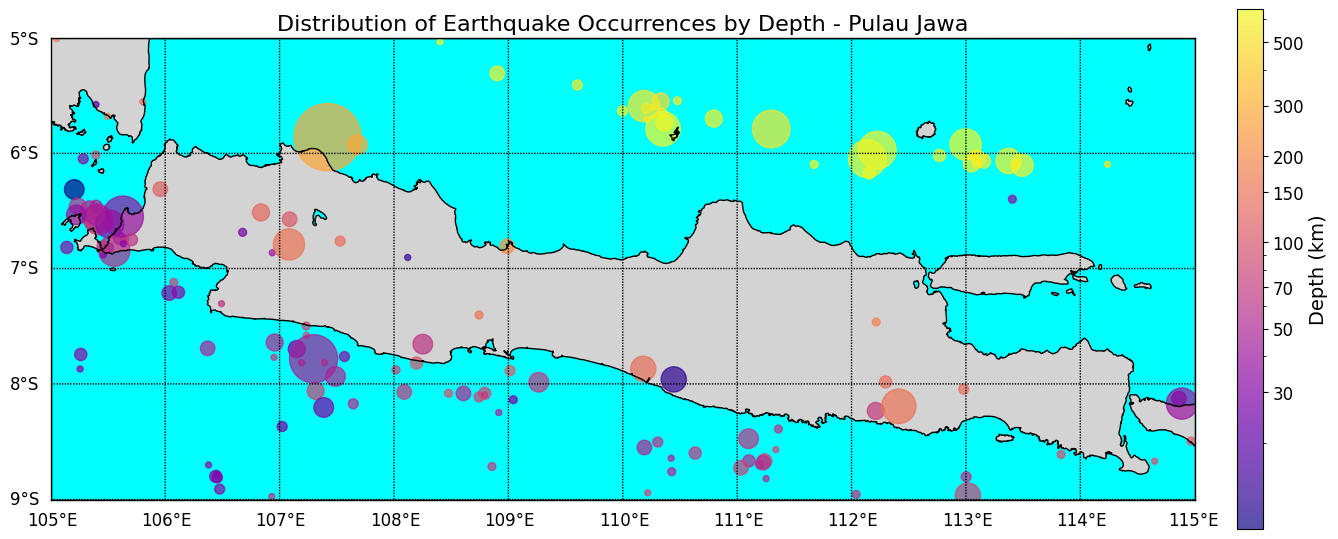

In [5]:
# Load dataset gempa dari URL atau file lokal jika sudah didownload
url = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/USGS/database_original.csv"

# Membaca dataset gempa
data_gempa = pd.read_csv(url)

# Menghapus baris dengan nilai NaN pada kolom 'Magnitude', 'Latitude', 'Longitude', dan 'Depth'
data_gempa = data_gempa.dropna(subset=['Magnitude', 'Latitude', 'Longitude', 'Depth'])

# Batas-batas wilayah Pulau Jawa
lon_min, lon_max = 105, 115
lat_min, lat_max = -9, -5

# Memfilter data hanya untuk wilayah Pulau Jawa
data_jawa = data_gempa[(data_gempa['Longitude'] >= lon_min) & (data_gempa['Longitude'] <= lon_max) &
                       (data_gempa['Latitude'] >= lat_min) & (data_gempa['Latitude'] <= lat_max)]

# Membuat peta distribusi spasial kejadian gempa berdasarkan kedalaman
plt.figure(figsize=(18, 9))
m = Basemap(projection='merc', llcrnrlat=lat_min, urcrnrlat=lat_max, llcrnrlon=lon_min, urcrnrlon=lon_max, resolution='h')
m.drawmapboundary(fill_color='aqua')
m.fillcontinents(color='lightgray', lake_color='aqua')
m.drawcoastlines()
m.drawparallels(np.arange(lat_min, lat_max+1, 1), labels=[1, 0, 0, 0], fontsize=12)
m.drawmeridians(np.arange(lon_min, lon_max+1, 1), labels=[0, 0, 0, 1], fontsize=12)

# Menambahkan titik-titik pada peta untuk mewakili gempa dengan warna berdasarkan kedalaman gempa
x, y = m(data_jawa['Longitude'].values, data_jawa['Latitude'].values)
c = m.scatter(x, y, c=data_jawa['Depth'].values, cmap='plasma', norm=LogNorm(), s=150*(data_jawa['Magnitude']-5.0)**3, alpha=0.7)

# Menambahkan colorbar untuk menampilkan skala kedalaman dengan interval yang diinginkan
depth_ticks = [0, 30, 50, 70, 100, 150, 200, 300, 500, 700]
cbar = plt.colorbar(c, orientation='vertical', pad=0.03, shrink=0.75, ticks=depth_ticks)
cbar.set_label("Depth (km)", fontsize=14)

# Menambahkan label pada colorbar dengan interval yang diinginkan
cbar.ax.set_yticklabels(depth_ticks, fontsize=12)

plt.title("Distribution of Earthquake Occurrences by Depth - Pulau Jawa", fontsize=16)
plt.show()


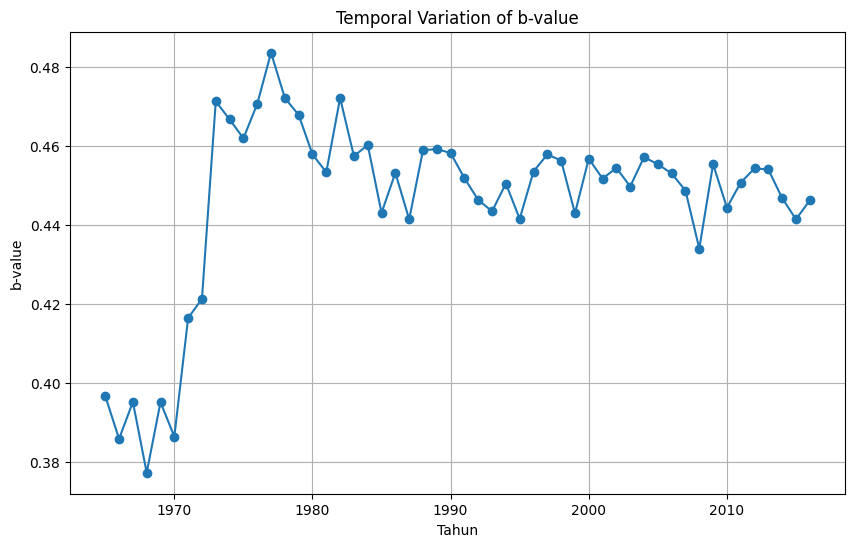

In [6]:
# Load dataset gempa dari URL atau file lokal jika sudah didownload
url = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/USGS/database_original.csv"

# Membaca dataset gempa
data_gempa = pd.read_csv(url)

# Menghapus baris dengan nilai NaN pada kolom 'Magnitude', 'Latitude', 'Longitude', dan 'Depth'
data_gempa = data_gempa.dropna(subset=['Magnitude', 'Latitude', 'Longitude', 'Depth'])

# Membagi data gempa menjadi beberapa periode waktu (misalnya per tahun)
data_gempa['Date'] = pd.to_datetime(data_gempa['Date'])
data_gempa['Tahun'] = data_gempa['Date'].dt.year

# Hitung b-value untuk setiap tahun
years = sorted(data_gempa['Tahun'].unique())
b_values = []

for year in years:
    data_year = data_gempa[data_gempa['Tahun'] == year]
    magnitudes = data_year['Magnitude'].values
    N = len(magnitudes)
    M0 = 10**(1.5 * (magnitudes.mean() - np.log10(9.05)) + 16.1)
    b_value = (np.log10(np.e) / (magnitudes - 4.8)).sum() / N
    b_values.append(b_value)

# Plot hasil variasi temporal b-value
plt.figure(figsize=(10, 6))
plt.plot(years, b_values, marker='o', linestyle='-')
plt.xlabel('Tahun')
plt.ylabel('b-value')
plt.title('Temporal Variation of b-value')
plt.grid(True)
plt.show()

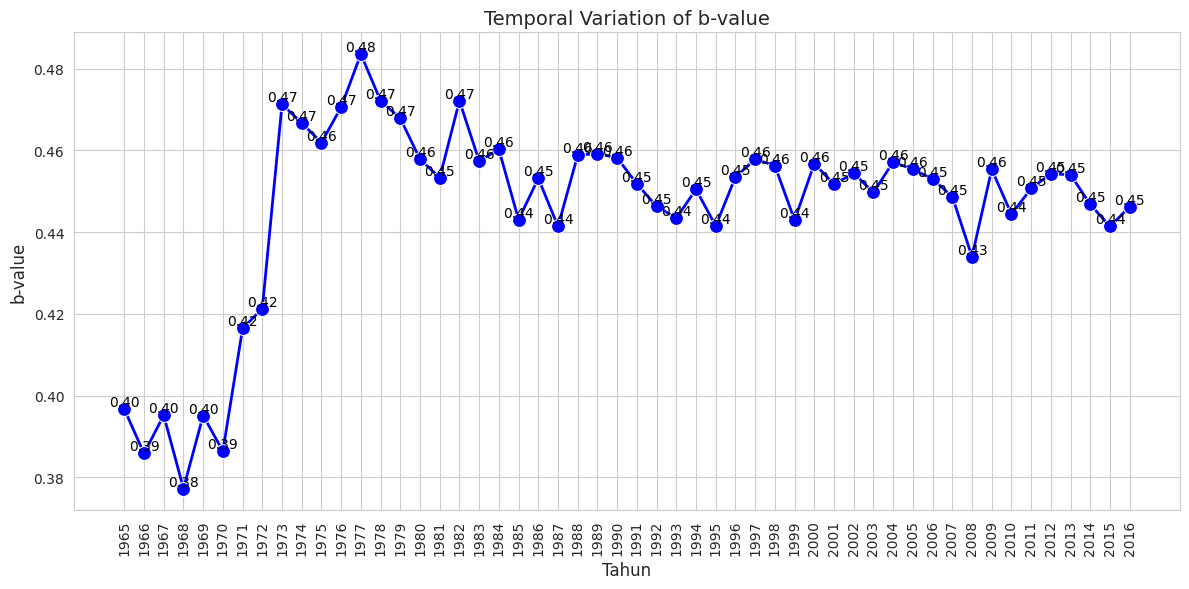

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

# Load dataset gempa dari URL atau file lokal jika sudah didownload
url = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/USGS/database_original.csv"

# Membaca dataset gempa
data_gempa = pd.read_csv(url)

# Menghapus baris dengan nilai NaN pada kolom 'Magnitude', 'Latitude', 'Longitude', dan 'Depth'
data_gempa = data_gempa.dropna(subset=['Magnitude', 'Latitude', 'Longitude', 'Depth'])

# Mengubah kolom 'Date' menjadi tipe data datetime
data_gempa['Date'] = pd.to_datetime(data_gempa['Date'])

# Membagi data gempa menjadi beberapa periode waktu (misalnya per tahun)
data_gempa['Tahun'] = data_gempa['Date'].dt.year

# Hitung b-value untuk setiap tahun
years = sorted(data_gempa['Tahun'].unique())
b_values = []

for year in years:
    data_year = data_gempa[data_gempa['Tahun'] == year]
    magnitudes = data_year['Magnitude'].values
    N = len(magnitudes)
    M0 = 10**(1.5 * (magnitudes.mean() - np.log10(9.05)) + 16.1)
    b_value = (np.log10(np.e) / (magnitudes - 4.8)).sum() / N
    b_values.append(b_value)

# Plot hasil variasi temporal b-value dengan menggunakan seaborn
plt.figure(figsize=(12, 6))
sns.set_style('whitegrid')
sns.lineplot(x=years, y=b_values, marker='o', markersize=10, linewidth=2, color='blue')
plt.xlabel('Tahun', fontsize=12)
plt.ylabel('b-value', fontsize=12)
plt.title('Temporal Variation of b-value', fontsize=14)
plt.xticks(ticks=years, labels=years, rotation=90, fontsize=10, ha='center')
plt.grid(True)
plt.tight_layout()

# Menambahkan nilai b-value di dalam grafik
for i in range(len(years)):
    plt.text(years[i], b_values[i], f'{b_values[i]:.2f}', ha='center', va='bottom', fontsize=10, color='black')

plt.show()


<ipython-input-8-11335a43838e>:20: RuntimeWarning: divide by zero encountered in log10
  log_hist = np.log10(hist)


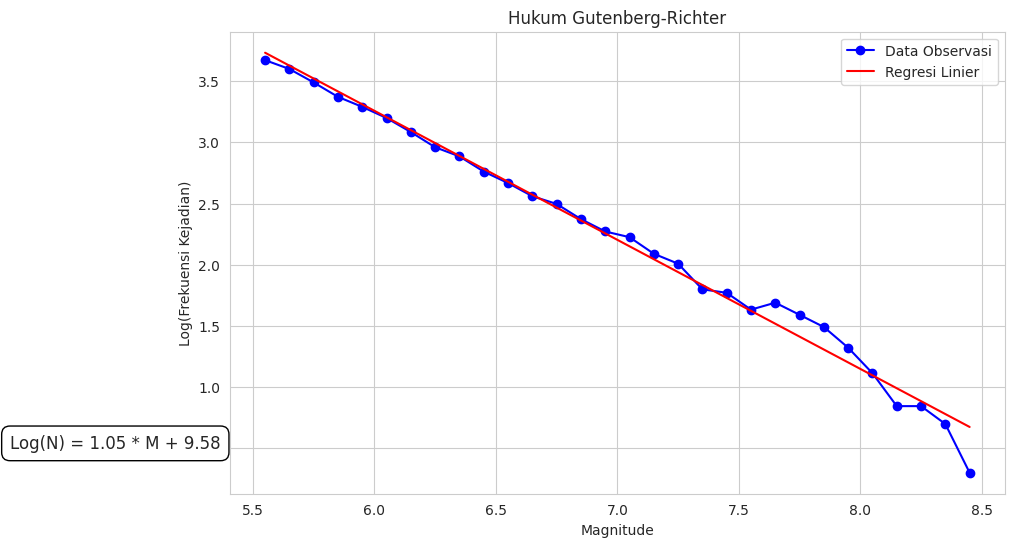

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Load dataset gempa dari URL atau file lokal jika sudah didownload
url = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/USGS/database_original.csv"

# Membaca dataset gempa
data_gempa = pd.read_csv(url)

# Menghapus baris dengan nilai NaN pada kolom 'Magnitude', 'Latitude', 'Longitude', dan 'Depth'
data_gempa = data_gempa.dropna(subset=['Magnitude', 'Latitude', 'Longitude', 'Depth'])

# Menghitung frekuensi kejadian gempa pada setiap bin magnitudo dalam skala log-log
bin_edges = np.arange(4.0, 8.6, 0.1)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

hist, _ = np.histogram(data_gempa['Magnitude'], bins=bin_edges)
log_hist = np.log10(hist)

# Fungsi regresi linier untuk mengestimasi nilai b-value
def linear_fit(x, a, b):
    return a * x + b

# Membersihkan data dari nilai NaN atau infinity
mask = ~np.isnan(bin_centers) & ~np.isinf(log_hist)
bin_centers_clean = bin_centers[mask]
log_hist_clean = log_hist[mask]

# Melakukan regresi linier untuk mendapatkan nilai b-value dan a-value
params, _ = curve_fit(linear_fit, bin_centers_clean, log_hist_clean)
b_value = -params[0]
a_value = params[1]

# Persamaan a-value dan b-value dalam bentuk string
equation_str = f'Log(N) = {b_value:.2f} * M + {a_value:.2f}'

# Plot Hukum Gutenberg-Richter beserta persamaan a-value dan b-value
plt.figure(figsize=(10, 6))
plt.plot(bin_centers_clean, log_hist_clean, marker='o', color='b', label='Data Observasi')
plt.plot(bin_centers_clean, linear_fit(bin_centers_clean, *params), color='r', linestyle='-', label='Regresi Linier')
plt.xlabel('Magnitude')
plt.ylabel('Log(Frekuensi Kejadian)')
plt.title('Hukum Gutenberg-Richter')
plt.text(4.5, 0.5, equation_str, fontsize=12, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
plt.grid(True)
plt.legend()
plt.show()

In [9]:
import numpy as np
import pandas as pd
from tabulate import tabulate

# Load dataset gempa dari URL atau file lokal jika sudah didownload
url = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/USGS/database_original.csv"
data_gempa = pd.read_csv(url)

# Menghapus baris dengan nilai NaN pada kolom 'Magnitude', 'Latitude', 'Longitude', dan 'Depth'
data_gempa = data_gempa.dropna(subset=['Magnitude', 'Latitude', 'Longitude', 'Depth'])

# Membuat kolom baru untuk menentukan pulau berdasarkan lokasi geografis
def assign_island(row):
    if -10 <= row['Latitude'] <= -5 and 105 <= row['Longitude'] <= 115:
        return 'Jawa'
    elif -6 <= row['Latitude'] <= 0 and 103 <= row['Longitude'] <= 119:
        return 'Sumatera'
    elif -6 <= row['Latitude'] <= 6 and 94 <= row['Longitude'] <= 141:
        return 'Kalimantan'
    elif -10 <= row['Latitude'] <= -6 and 95 <= row['Longitude'] <= 141:
        return 'Sulawesi'
    elif -10 <= row['Latitude'] <= 6 and 95 <= row['Longitude'] <= 141:
        return 'Nusa Tenggara'
    else:
        return 'Lainnya'

data_gempa['Island'] = data_gempa.apply(assign_island, axis=1)

# Menghitung jumlah kejadian gempa setiap pulau
jumlah_gempa = data_gempa['Island'].value_counts()

# Membuat fungsi untuk menghitung a-value dan b-value
def calculate_ab_value(data):
    magnitudes = data['Magnitude'].values
    N = len(magnitudes)
    if N == 0:
        return np.nan, np.nan, np.nan  # Kembalikan NaN jika tidak ada data gempa
    M0 = 10**(1.5 * (magnitudes.mean() - np.log10(9.05)) + 16.1)
    b_value = (np.log10(np.e) / (magnitudes - 4.8)).sum() / N
    a_value = np.log10(N) + b_value * 4.8
    Mc = magnitudes.min()
    return a_value, b_value, Mc

# Menghitung a-value, b-value, dan Mc untuk setiap pulau
a_values = []
b_values = []
mc_values = []
pulau_names = []

for island, island_data in data_gempa.groupby('Island'):
    a_value, b_value, Mc = calculate_ab_value(island_data)
    a_values.append(a_value)
    b_values.append(b_value)
    mc_values.append(Mc)
    pulau_names.append(island)

# Membuat tabel untuk Koefisien FMD (a dan b-value) berdasarkan pulau serta jumlah kejadian gempa
tabel_fmd = pd.DataFrame({'Pulau': pulau_names,
                          'Jumlah Gempa': jumlah_gempa, 'a-value': a_values, 'b-value': b_values, 'Mc': mc_values})

# Konversi tabel ke dalam format tabulate
tabel_fmd_tabulate = tabulate(tabel_fmd, headers='keys', tablefmt='pretty', showindex=False)

# Tampilkan tabel
print(tabel_fmd_tabulate)


+------------+--------------+--------------------+---------------------+-----+
|   Pulau    | Jumlah Gempa |      a-value       |       b-value       | Mc  |
+------------+--------------+--------------------+---------------------+-----+
|    Jawa    |    20434     | 4.459807601866903  | 0.4563113870102055  | 5.5 |
| Kalimantan |     2169     | 5.502796501065155  | 0.45136186438561704 | 5.5 |
|  Lainnya   |     574      | 6.457213041644033  | 0.44726242762479984 | 5.5 |
|  Sulawesi  |     186      | 4.9453371167348905 | 0.45550525507019096 | 5.5 |
|  Sumatera  |      46      | 3.741596841185519  | 0.43309146031332185 | 5.5 |
+------------+--------------+--------------------+---------------------+-----+


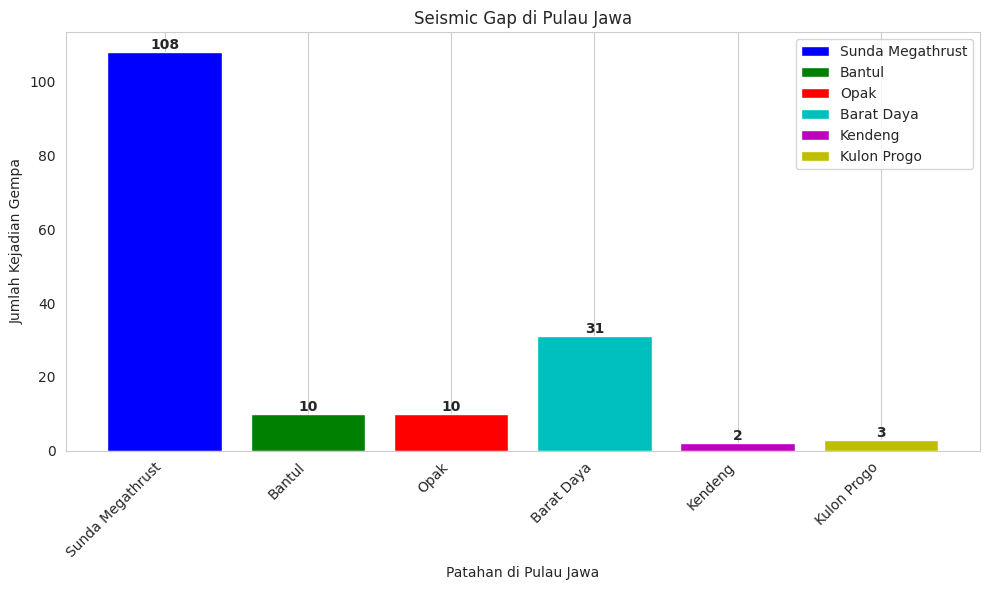

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point

# Load dataset gempa dari URL atau file lokal jika sudah didownload
url = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/USGS/database_original.csv"
data_gempa = pd.read_csv(url)

# Menghapus baris dengan nilai NaN pada kolom 'Magnitude', 'Latitude', 'Longitude', dan 'Depth'
data_gempa = data_gempa.dropna(subset=['Magnitude', 'Latitude', 'Longitude', 'Depth'])

# Membuat kolom baru untuk menentukan pulau berdasarkan lokasi geografis
def assign_island(row):
    if -10 <= row['Latitude'] <= -5 and 105 <= row['Longitude'] <= 115:
        return 'Jawa'
    elif -6 <= row['Latitude'] <= 0 and 103 <= row['Longitude'] <= 119:
        return 'Sumatera'
    elif -6 <= row['Latitude'] <= 6 and 94 <= row['Longitude'] <= 141:
        return 'Kalimantan'
    elif -10 <= row['Latitude'] <= -6 and 95 <= row['Longitude'] <= 141:
        return 'Sulawesi'
    elif -10 <= row['Latitude'] <= 6 and 95 <= row['Longitude'] <= 141:
        return 'Nusa Tenggara'
    else:
        return 'Lainnya'

data_gempa['Island'] = data_gempa.apply(assign_island, axis=1)

# Mendefinisikan batas patahan-patahan di Pulau Jawa (bisa ditambahkan patahan lain jika ada data)
batas_patahan_jawa = {
    'Sunda Megathrust': (105, 110),
    'Bantul': (110.2, 110.4),
    'Opak': (110.3, 110.5),
    'Barat Daya': (111, 113),
    'Kendeng': (112.5, 112.7),
    'Kulon Progo': (110.1, 110.2)
}

# Menghitung jumlah kejadian gempa di setiap patahan
jumlah_gempa_patahan = {patahan: len(data_gempa[(data_gempa['Island'] == 'Jawa') &
                                              (data_gempa['Longitude'] >= lon_min) &
                                              (data_gempa['Longitude'] <= lon_max)])
                       for patahan, (lon_min, lon_max) in batas_patahan_jawa.items()}

# Membuat gambar seismic gap dalam bentuk batang (histogram)
plt.figure(figsize=(10, 6))
colors = ['b', 'g', 'r', 'c', 'm', 'y']  # Warna untuk setiap patahan
for i, (patahan, count) in enumerate(jumlah_gempa_patahan.items()):
    plt.bar(patahan, count, color=colors[i], label=patahan)
    plt.text(patahan, count, str(count), ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.xlabel('Patahan di Pulau Jawa')
plt.ylabel('Jumlah Kejadian Gempa')
plt.title('Seismic Gap di Pulau Jawa')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.legend()
plt.tight_layout()
plt.show()

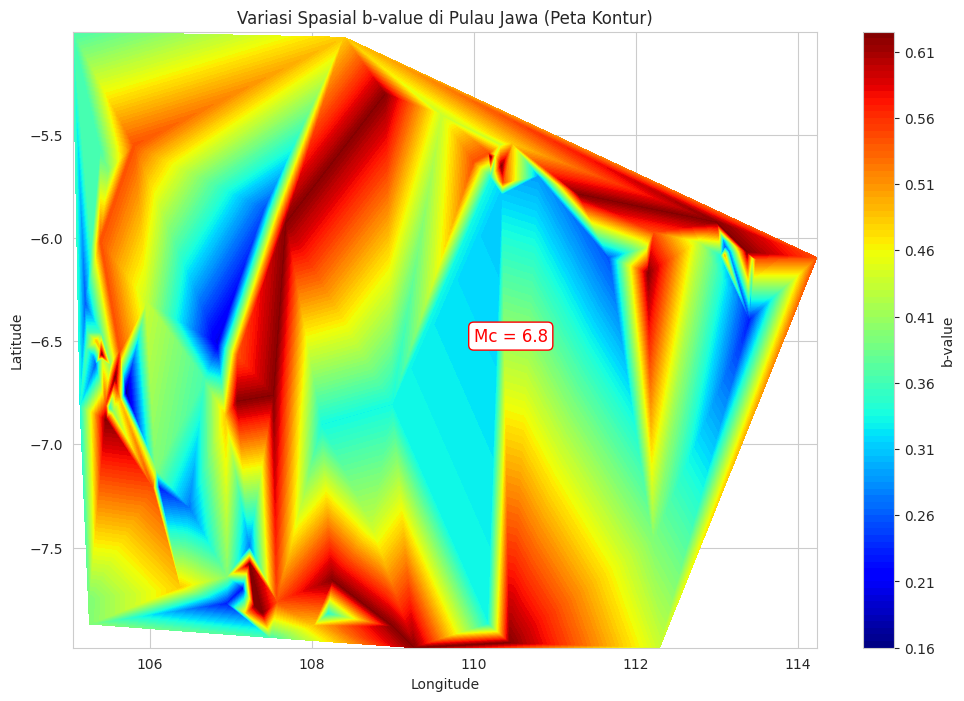

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from matplotlib.tri import Triangulation

# Load dataset gempa dari URL atau file lokal jika sudah didownload
url = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/USGS/database_original.csv"
data_gempa = pd.read_csv(url)

# Menghapus baris dengan nilai NaN pada kolom 'Magnitude', 'Latitude', 'Longitude', dan 'Depth'
data_gempa = data_gempa.dropna(subset=['Magnitude', 'Latitude', 'Longitude', 'Depth'])

# Filter data gempa hanya untuk wilayah Pulau Jawa
pulau_jawa = (data_gempa['Latitude'] >= -8) & (data_gempa['Latitude'] <= -5) & \
             (data_gempa['Longitude'] >= 105) & (data_gempa['Longitude'] <= 115)
data_pulau_jawa = data_gempa[pulau_jawa]

# Menghitung b-value untuk setiap koordinat geografis di Pulau Jawa
def calculate_b_value(magnitudes):
    if len(magnitudes) > 0:
        N = len(magnitudes)
        magnitudes_np = np.array(magnitudes)
        M0 = 10 ** (1.5 * (np.mean(magnitudes_np) - np.log10(9.05)) + 16.1)
        b_value = (np.log10(np.e) / (magnitudes_np - 4.8)).sum() / N
        return b_value
    else:
        return np.nan

# Mengelompokkan data gempa berdasarkan koordinat geografis
grouped_data = data_pulau_jawa.groupby(['Latitude', 'Longitude'])['Magnitude'].apply(list)

# Menghitung nilai b-value untuk setiap koordinat geografis
b_values = grouped_data.apply(calculate_b_value).values

# Persiapan data untuk peta kontur
lats = data_pulau_jawa['Latitude'].values
lons = data_pulau_jawa['Longitude'].values
triang = Triangulation(lons, lats)

# Plot peta kontur variasi spasial nilai-b di Pulau Jawa
plt.figure(figsize=(12, 8))
plt.tricontourf(triang, b_values, levels=100, cmap='jet')
plt.colorbar(label='b-value')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Tampilkan nilai Mc sebagai label di tengah-tengah grafik
mc_value = 6.8
mctext = f'Mc = {mc_value}'
plt.text(110, -6.5, mctext, color='red', fontsize=12,
         bbox=dict(facecolor='white', edgecolor='red', boxstyle='round,pad=0.3'))

plt.title('Variasi Spasial b-value di Pulau Jawa (Peta Kontur)')
plt.show()


/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_rivers_lake_centerlines.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


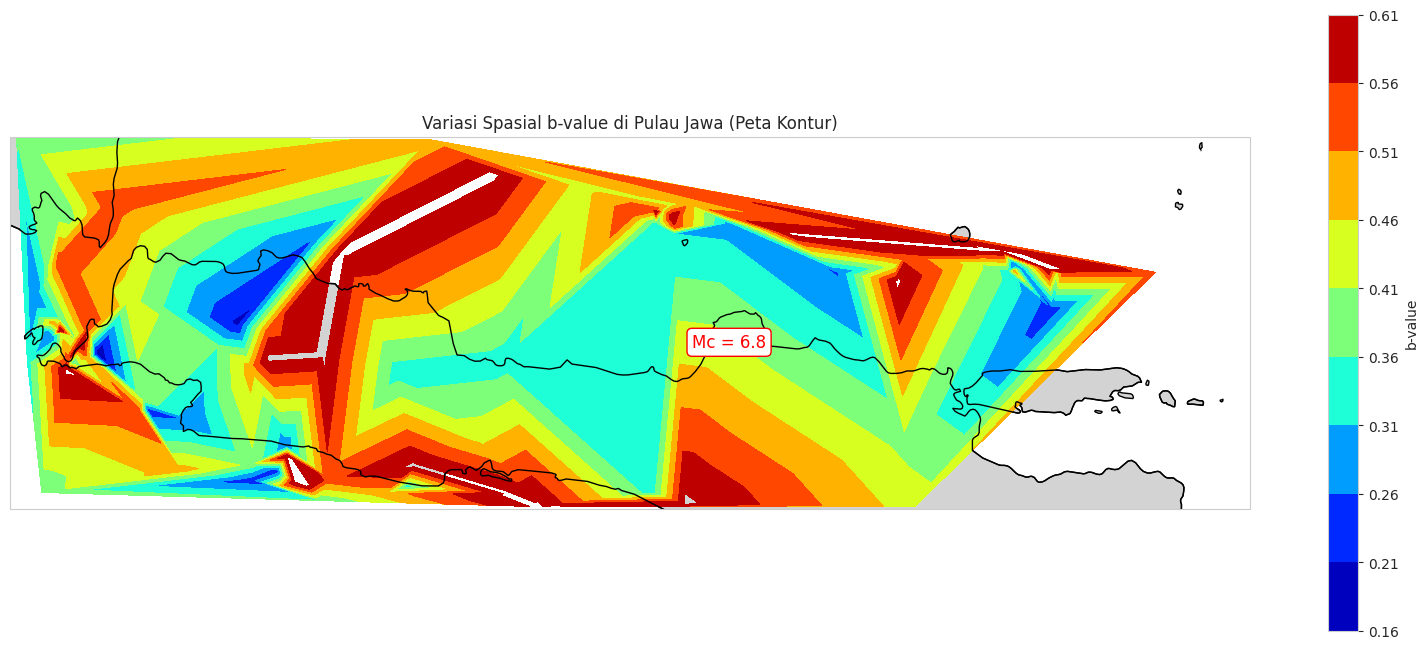

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Load dataset gempa dari URL atau file lokal jika sudah didownload
url = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/USGS/database_original.csv"
data_gempa = pd.read_csv(url)

# Menghapus baris dengan nilai NaN pada kolom 'Magnitude', 'Latitude', 'Longitude', dan 'Depth'
data_gempa = data_gempa.dropna(subset=['Magnitude', 'Latitude', 'Longitude', 'Depth'])

# Filter data gempa hanya untuk wilayah Pulau Jawa
pulau_jawa = (data_gempa['Latitude'] >= -8) & (data_gempa['Latitude'] <= -5) & \
             (data_gempa['Longitude'] >= 105) & (data_gempa['Longitude'] <= 115)
data_pulau_jawa = data_gempa[pulau_jawa]

# Menghitung b-value untuk setiap koordinat geografis di Pulau Jawa
def calculate_b_value(magnitudes):
    if len(magnitudes) > 0:
        N = len(magnitudes)
        magnitudes_np = np.array(magnitudes)
        M0 = 10 ** (1.5 * (np.mean(magnitudes_np) - np.log10(9.05)) + 16.1)
        b_value = (np.log10(np.e) / (magnitudes_np - 4.8)).sum() / N
        return b_value
    else:
        return np.nan

# Mengelompokkan data gempa berdasarkan koordinat geografis
grouped_data = data_pulau_jawa.groupby(['Latitude', 'Longitude'])['Magnitude'].apply(list)

# Menghitung nilai b-value untuk setiap koordinat geografis
b_values = grouped_data.apply(calculate_b_value).values

# Plot peta variasi spasial nilai-b di Pulau Jawa dengan peta kontur
plt.figure(figsize=(20, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([105, 115, -8, -5])

# Tambahkan peta fisik sebagai latar belakang
ax.add_feature(cfeature.LAND, facecolor='lightgray', edgecolor='black')
ax.add_feature(cfeature.COASTLINE, edgecolor='black')
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.RIVERS, edgecolor='blue')

# Plot peta kontur variasi spasial nilai-b di atas Pulau Jawa
levels = np.linspace(0.16, 0.61, 10)  # Sesuaikan dengan rentang nilai b-value yang Anda inginkan
contour = plt.tricontourf(data_pulau_jawa['Longitude'], data_pulau_jawa['Latitude'], b_values, levels=levels, cmap='jet')

# Tampilkan nilai Mc sebagai label di tengah-tengah grafik
mc_value = 6.8
mctext = f'Mc = {mc_value}'
plt.text(110.5, -6.7, mctext, color='red', fontsize=12, bbox=dict(facecolor='white', edgecolor='red', boxstyle='round,pad=0.3'))

plt.colorbar(contour, ticks=levels, label='b-value')
plt.title('Variasi Spasial b-value di Pulau Jawa (Peta Kontur)')
plt.show()


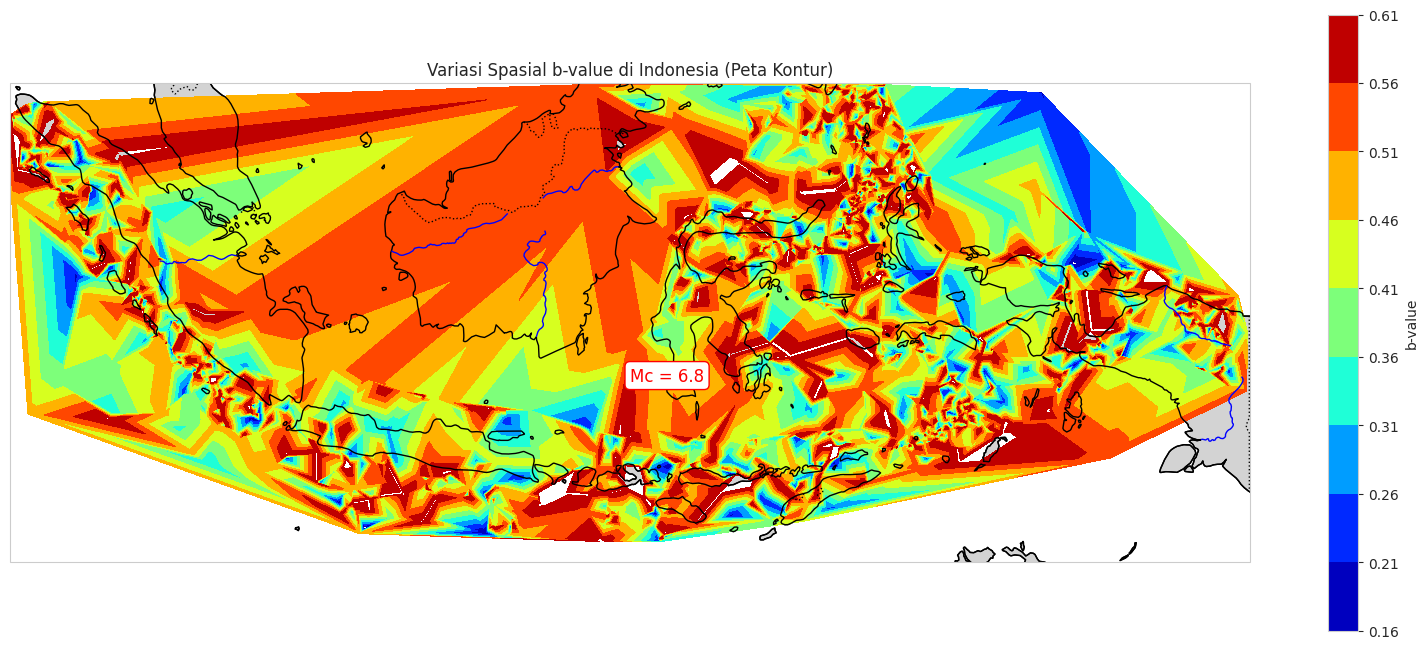

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Load dataset gempa dari URL atau file lokal jika sudah didownload
url = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/USGS/database_original.csv"
data_gempa = pd.read_csv(url)

# Menghapus baris dengan nilai NaN pada kolom 'Magnitude', 'Latitude', 'Longitude', dan 'Depth'
data_gempa = data_gempa.dropna(subset=['Magnitude', 'Latitude', 'Longitude', 'Depth'])

# Filter data gempa hanya untuk wilayah Indonesia
indonesia = (data_gempa['Latitude'] >= -11) & (data_gempa['Latitude'] <= 6) & \
             (data_gempa['Longitude'] >= 95) & (data_gempa['Longitude'] <= 141)
data_indonesia = data_gempa[indonesia]

# Menghitung b-value untuk setiap koordinat geografis di Indonesia
def calculate_b_value(magnitudes):
    if len(magnitudes) > 0:
        N = len(magnitudes)
        magnitudes_np = np.array(magnitudes)
        M0 = 10 ** (1.5 * (np.mean(magnitudes_np) - np.log10(9.05)) + 16.1)
        b_value = (np.log10(np.e) / (magnitudes_np - 4.8)).sum() / N
        return b_value
    else:
        return np.nan

# Mengelompokkan data gempa berdasarkan koordinat geografis
grouped_data = data_indonesia.groupby(['Latitude', 'Longitude'])['Magnitude'].apply(list)

# Menghitung nilai b-value untuk setiap koordinat geografis
b_values = grouped_data.apply(calculate_b_value).values

# Plot peta variasi spasial nilai-b di Indonesia dengan peta kontur
plt.figure(figsize=(20, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([95, 141, -11, 6])  # Sesuaikan dengan rentang wilayah Indonesia

# Tambahkan peta fisik sebagai latar belakang
ax.add_feature(cfeature.LAND, facecolor='lightgray', edgecolor='black')
ax.add_feature(cfeature.COASTLINE, edgecolor='black')
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.RIVERS, edgecolor='blue')

# Plot peta kontur variasi spasial nilai-b di atas wilayah Indonesia
levels = np.linspace(0.16, 0.61, 10)  # Sesuaikan dengan rentang nilai b-value yang Anda inginkan
contour = plt.tricontourf(data_indonesia['Longitude'], data_indonesia['Latitude'], b_values, levels=levels, cmap='jet')

# Tampilkan nilai Mc sebagai label di tengah-tengah grafik
mc_value = 6.8
mctext = f'Mc = {mc_value}'
plt.text(118, -5, mctext, color='red', fontsize=12, bbox=dict(facecolor='white', edgecolor='red', boxstyle='round,pad=0.3'))

plt.colorbar(contour, ticks=levels, label='b-value')
plt.title('Variasi Spasial b-value di Indonesia (Peta Kontur)')
plt.show()
